<h1 style="text-align: center;">MARINE PLASTIC POLLUTION DETECTION MODEL USING VISION

## 1. Problem Statement

Imagine you are responsible for protecting the world’s oceans and marine life. Plastic pollution in the ocean is a growing problem that harms marine creatures, damages ecosystems, and disrupts the balance of our planet. Identifying plastic waste in the water is challenging because it can blend with the environment and cover vast areas.

We want to build a computer program that can analyze images of marine environments and detect the presence of plastic pollution. This program can help researchers, environmentalists, and cleanup teams quickly identify problem areas and take action to remove the plastic, saving marine life and keeping our oceans healthy.

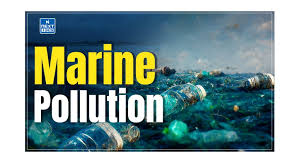

## 2. Objectives

This project will:

1.Teach the computer to recognize pictures with plastic pollution and without plastic pollution.
    
    Train the program to identify plastic waste in various marine environments, such as oceans, rivers, and beaches, using labeled images.

2.Build a model (a smart program) that looks at marine pictures and decides if there’s plastic pollution.
   
    Use machine learning techniques to develop a reliable and accurate detection system that distinguishes between clean and polluted marine areas.

3.Show us a simple screen (a GUI) where we can upload marine pictures and get quick answers about pollution.
    
    Provide an easy-to-use graphical interface where users can upload images and instantly see results about the presence of plastic.

4.Help protect marine life and ecosystems by identifying areas with plastic pollution.
    
    Enable faster cleanup efforts and targeted actions to reduce plastic waste, ensuring healthier oceans and aquatic habitats.







### 3. Dataset Information

To teach the computer about plastic pollution, we’ll use a special set of pictures called a dataset. This dataset will contain images of marine environments divided into two categories: one with visible plastic pollution (Plastic) and another without plastic pollution (No Plastic). These images will help the computer learn to recognize and differentiate between clean and polluted marine environments.

    Where to get the Dataset: You can download the dataset from kaggle
    https://www.kaggle.com/datasets/surajit651/souvikdataset
    Dataset Floders:
        Inside, there are two main forlders: Train Nad Test
        Each fodler has two Subfolders:
            No_Plastic : Contains pictures showing clean oceans and shores.
            Plastic : Contains pictures showing polluted oceans and shores. 

## 4. Understanding the CNN Model

CNN stands for Convolutional Neural Network. It’s a special type of program that can look at pictures and learn to find important details. Imagine how you look at a picture and notice trees, animals, or fire — CNN does something similar!

Here’s how it works, step-by-step:

    Looking at Patterns: The CNN looks at lots of tiny patterns in pictures, like shapes and colors.
    Learning from Examples: It looks at many images of Clean oceans and polluted oceans to learn what makes them different.
    Making Predictions: Once trained, the CNN can look at a new picture and guess if it shows a fire or not.

## 5. Code Implementation

### Step 1: Importing Libraries

We’ll use Python with TensorFlow/Keras for the CNN model and Tkinter for the GUI. Make sure you have these libraries installed.

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Loading and Preprocessing the Data

We'll use ImageDataGenerator to load images from your dataset's train, valid, and test folders. This will resize and normalize images so our model can use them.

In [10]:
base_dir = r"C:/Users/HP/Desktop/GreenAIWorkshop/Marine pollution image dataset/SOUVIK"
train_dir=base_dir + r"/train"
test_dir = base_dir + r"/test"


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_data =train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 1720 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


## Sample images from the dataset with labels
#### The code generates a visual output showcasing sample images from the training dataset for both classes: "No Plastic" and "Plastic".

Output Description:
Figure Layout:

A single row of 4 images is displayed, with each image representing a sample from the training data.
Image Details:

Each subplot contains:
The image itself (plt.imshow(image[0])).
A title indicating its class: "Plastic" or "No Plastic".
Axes are turned off for a cleaner look.
Overall Title:

A main title, "Sample Images from Each Class", provides context for the figure.

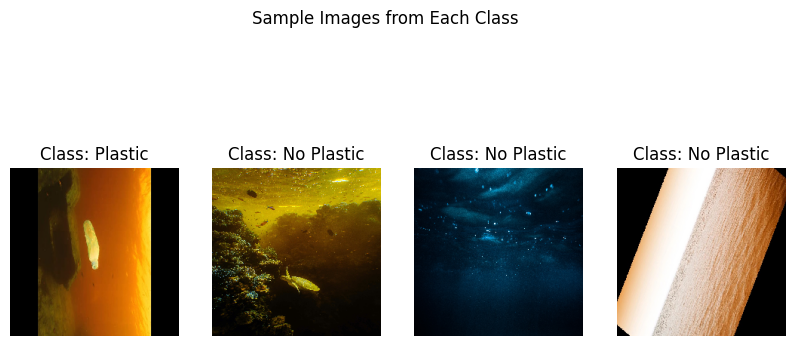

In [16]:
plt.figure(figsize=(10,5))
for i in range(4):
    image, label = next(train_data)
    plt.subplot(1,4, i + 1)
    plt.imshow(image[0])
    plt.title("Class: " + ("No Plastic" if label[0] == 0 else "Plastic"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

The code creates a deep learning model for binary classification using MobileNetV2 as a pretrained base model. The base is frozen to retain learned features. The model adds global pooling and a dense layer with a sigmoid activation for output. It is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

In [31]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
mobilenet_model.trainable =False
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])    

### Step 4: Training the Model

Train the model with the train and valid data.

In [36]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)
model.save('mobilenet_waste_classifier.h5')
loss, accuracy=model.evaluate(test_data)
print("Model Accuracy:",accuracy)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9639 - loss: 0.1288 - val_accuracy: 0.8814 - val_loss: 0.2626
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9768 - loss: 0.0975 - val_accuracy: 0.8860 - val_loss: 0.2424
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9851 - loss: 0.0793 - val_accuracy: 0.8953 - val_loss: 0.2177
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9888 - loss: 0.0708 - val_accuracy: 0.9070 - val_loss: 0.2004
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9881 - loss: 0.0591 - val_accuracy: 0.9047 - val_loss: 0.1937
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9927 - loss: 0.0586 - val_accuracy: 0.9093 - val_loss: 0.1866
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9919 - loss: 0.0471 - val_accuracy: 0.9116 - val_loss: 0.1859
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9944 - loss: 0.0425 - val_accuracy: 0.9116 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9174 - loss: 0.1681
Model Accuracy: 0.9139534831047058


The code evaluates the model's performance on the test data by generating two key metrics: classification report and confusion matrix.

Steps:
Generate Predictions:

y_pred_prob: The model's predicted probabilities for the test data.
y_pred: The binary class predictions (0 or 1), where values greater than 0.5 are classified as "Plastic" (1), otherwise "No Plastic" (0).
Classification Report:

classification_report: Provides detailed performance metrics like precision, recall, f1-score for each class (Plastic and No Plastic).
Confusion Matrix:

confusion_matrix: Displays the true positives, true negatives, false positives, and false negatives to show how well the model classifies each class.
Output:
Classification Report: Displays metrics for both classes: No Plastic and Plastic.
Confusion Matrix: Shows the breakdown of correct and incorrect predictions.

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

#Generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_data.classes

#Print classification report
print("Classification report:\n",classification_report(y_true,y_pred,target_names=['No Plastic','Plastic']))

#Print confusion matrix
conf_matrix = confusion_matrix(y_true,y_pred)
print("Confusion Matrix:\n",conf_matrix)

#Here, we measure the perfornmance of the model.

14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step
Classification report:
               precision    recall  f1-score   support

  No Plastic       0.49      0.47      0.48       220
     Plastic       0.47      0.49      0.48       210

    accuracy                           0.48       430
   macro avg       0.48      0.48      0.48       430
weighted avg       0.48      0.48      0.48       430

Confusion Matrix:
 [[103 117]
 [108 102]]


The code loads a pre-trained model (mobilenet_waste_classifier.h5) and uses it to predict the class of a single test image (no_plastic (957).jpg). The image is resized to (224x224), normalized, and passed through the model. Based on the predicted probability, it classifies the image as either "Plastic" or "No Plastic." Finally, it displays the test image with the prediction title.








1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


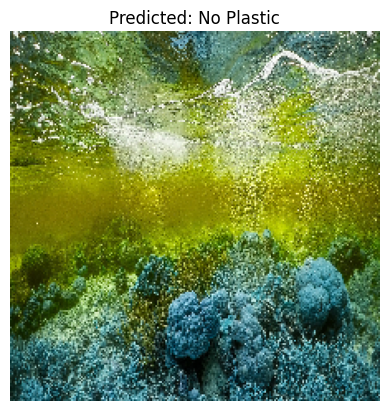

In [14]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from warnings import filterwarnings
filterwarnings('ignore')
#Path to the trained model and test image
model_path = 'mobilenet_waste_classifier.h5'
test_image_path = r"C:\Users\HP\Desktop\GreenAIWorkshop\Marine pollution image dataset\SOUVIK\test\no-plastic\no_plasic (957).jpg"
#Load the trained model
model = tf.keras.models.load_model(model_path)

#Load and prepare the test image
test_img = load_img(test_image_path,target_size=(224,224))# Load Image and resize
test_img_array= img_to_array(test_img)/255.0 # Normalize pixel values
test_img_array = np.expand_dims(test_img_array,axis=0)# ADD batch dimension

#Predict the class of the test image
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'No Plastic' if predicted_prob < 0.5 else "Plastic"

#Display the test image and prediction
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()